# Trabalho 1
# Codificação de arquivos e operações pontuais

-------

1) Utilizando a seguinte [imagem colorida](https://ead.ime.uerj.br/pluginfile.php/176/mod_assign/intro/VisaoTrab1.tiff), implemente  e demonstre as diferenças entre as versões a serem salvas nos formatos de arquivo a seguir: 

* JPEG - 10%
* JPEG - 50%
* JPEG - 90%
* TIFF - LZW

Para diferenciar as imagens armazenadas nos arquivos da imagem original utilize como métrica a média do erro quadrático dos pixels em cada um dos canais e o tamanho dos arquivos.

Explique os resultados obtidos em função da teoria apresentada nas aulas.

-------

2) Utilizando mesma [imagem colorida](https://ead.ime.uerj.br/pluginfile.php/176/mod_assign/intro/VisaoTrab1.tiff), implemente uma correção gama para corrigir a luminância da face do bebê. Para tanto são necessários os seguintes passos:

* Leitura da imagem de entrada no formato colorido rgb do openCV
* Conversão do sistema de cor da imagem para hsv
* Aplicação da correção gama sobre o canal v
* Conversão da imagem resultante para rgb
* Salvar a imagem no formato tiff sem compressão.

Explique os resultados obtidos em função da teoria apresentada nas aulas. Utilize como fermenta o histograma das imagens.

-------

## Bibliotecas

Na célular seguinte estão as bibliotecas usadas para resolver o trabalho como um todo.

In [8]:
%matplotlib inline

import cv2
import numpy as np

import matplotlib.pyplot as plt

## Parte (1)

Abaixo lemos a imagem **VisaoTrab1.tiff** que está no formato **.tiff**. A sigla **.tiff**, do inglês, é a abreviação de *Tagged Image File Format*, trata-se de um formato para imagens digitais, que consegue salvar imagens sem perda de informação.

In [32]:
img = cv2.imread('../images/VisaoTrab1.tiff', cv2.IMREAD_UNCHANGED)

In [33]:
type(img)

numpy.ndarray

In [34]:
img.shape

(512, 512, 3)

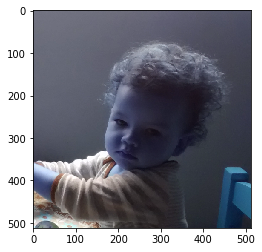

In [36]:
plt.imshow(img)
plt.show()

In [38]:
cv2.imwrite('../images/VisaoTrab1_10.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 10])
cv2.imwrite('../images/VisaoTrab1_50.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 50])
cv2.imwrite('../images/VisaoTrab1_90.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 90])
cv2.imwrite('../images/VisaoTrab1_LZW.tiff', img)

True